<a href="https://colab.research.google.com/github/theadisingh/DS-Mini-Project/blob/main/Mini_Project_Musical_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
cd /content/drive/My Drive/Data Science Internship/Minor Project

/content/drive/My Drive/Data Science Internship/Minor Project


In [114]:
!pip install bing-image-downloader

In [103]:
#Using Bing Image Downlaoder

import bing_image_downloader
from bing_image_downloader import downloader

In [ ]:
#Downloading Images of different Musical Instruments

downloader.download('Drums', limit = 30, output_dir='Images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('Guitar', limit = 30, output_dir='Images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('Piano', limit = 30, output_dir='Images', adult_filter_off=True, force_replace=False, timeout=60)

In [105]:
#Preprocessing of Images (Resizing & Flattening)

import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []
flat_data = []

DATADIR = '/content/drive/My Drive/Data Science Internship/Minor Project/Images'
CATEGORIES = ['Drums','Guitar','Piano']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [106]:
#Splitting data into Training & Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=0)

In [107]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
#Predicting for test value

y_pred = clf.predict(x_test)
print(f'Predicted Output: {y_pred}')
print(f'Test Data: {y_test}')

Predicted Output: [0 0 1 1 2 1 1 1 2 2 0 0 1 2 0 0 0 1 2 1 0 2 2]
Test Data: [0 0 1 1 2 1 1 1 2 2 0 0 1 2 0 0 0 1 2 1 0 0 2]


In [109]:
#Accuracy of the model

from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Accuracy Score is {round(accuracy_score(y_pred,y_test)*100,2)}%')

Accuracy Score is 95.65%


Confusion matrix, without normalization
[[8 0 1]
 [0 8 0]
 [0 0 6]]
Normalized confusion matrix
[[0.88888889 0.         0.11111111]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


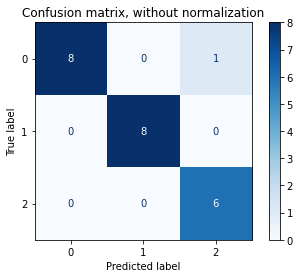

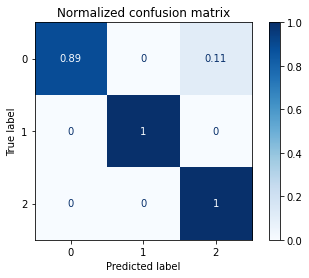

In [110]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Enter the URL of Image: https://images.unsplash.com/photo-1580625528104-830b09667e42?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80
Predicted Output: Drums


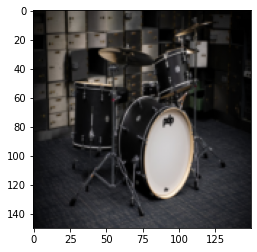

In [112]:
#Testing new images

new_flat_data = []
url = input('Enter the URL of Image: ')
new_img = imread(url)
new_img_resized = resize(new_img,(150,150,3))
new_flat_data.append(new_img_resized.flatten())
new_flat_data = np.array(new_flat_data)
plt.imshow(new_img_resized)
y_output = model.predict(new_flat_data)
y_output = CATEGORIES[y_output[0]]
print(f'Predicted Output: {y_output}')